## 3. pandas를 활용한 데이터 조사

In [2]:
import pandas as pd
df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
                 names = ['pregnant', 'plasma', 'pressure', 'thickness',
                          'insulin', 'BMI', 'pedigree', 'age', 'class'])

In [3]:
print(df.head())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [5]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


## 4. 데이터 가공하기

In [11]:
# as_index = False. 인덱스가 되면 속성으로 뽑아서 조회하지 못하므로 False로 지정
df_pregnant = df[['pregnant', 'class']].groupby(['pregnant'], as_index = False)
# print(type(df_pregnant))
# print(df_pregnant)
df_pregnant = df_pregnant.mean()
print(df_pregnant)

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [14]:
df_pregnant = df_pregnant.sort_values(by = 'pregnant', ascending = True)
df_pregnant

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


## 5. matplotlib를 이용해 그래프로 표현하기

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

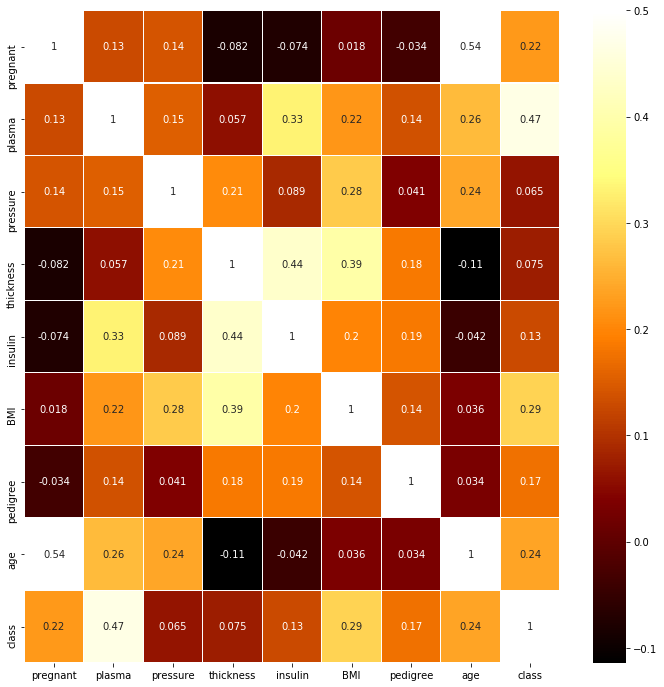

In [33]:
# 그래프의 크기 지정
plt.figure(figsize = (12, 12))

# 히트맵에 쓸 색상 지정 https://matplotlib.org/tutorials/colors/colormaps.html
data = df.corr()
colormap = plt.cm.afmhot

# data: 숫자값으로 이루어진 2차원 dataset / annot: 셀 안의 숫잣값 표시 / vmax = 0.5: 0.5이상의 값은 밝은 색으로 표시한다. 
sns.heatmap(data, linewidths = 0.1, vmax = 0.5, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

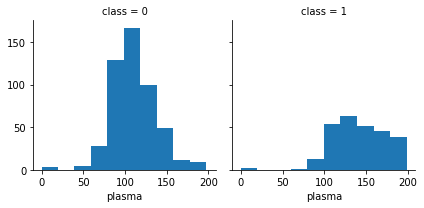

In [31]:
# plasma 속성와 class만 따로 떼어 두 항목 간의 관계를 그래프로 다시 한 번 확인
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

## 6. 피마 인디언의 당뇨병 예측 실행

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

In [41]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 10)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 427us/sample - loss: 11.4155 - accuracy: 0.6198
Epoch 2/200
768/768 [==============================] - 0s 61us/sample - loss: 6.4242 - accuracy: 0.6159
Epoch 3/200
768/768 [==============================] - 0s 97us/sample - loss: 3.6949 - accuracy: 0.5221
Epoch 4/200
768/768 [==============================] - 0s 66us/sample - loss: 2.2150 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 101us/sample - loss: 1.3725 - accuracy: 0.5182
Epoch 6/200
768/768 [==============================] - 0s 82us/sample - loss: 0.9083 - accuracy: 0.5586
Epoch 7/200
768/768 [==============================] - 0s 89us/sample - loss: 0.7783 - accuracy: 0.5547
Epoch 8/200
768/768 [==============================] - 0s 87us/sample - loss: 0.7476 - accuracy: 0.6172
Epoch 9/200
768/768 [==============================] - 0s 82us/sample - loss: 0.7330 - accuracy: 0.6615
Epoch 10/200
768/768 [==================

768/768 [==============================] - 0s 87us/sample - loss: 0.5159 - accuracy: 0.7201
Epoch 153/200
768/768 [==============================] - 0s 84us/sample - loss: 0.5196 - accuracy: 0.7266
Epoch 154/200
768/768 [==============================] - 0s 62us/sample - loss: 0.5053 - accuracy: 0.7214
Epoch 155/200
768/768 [==============================] - 0s 99us/sample - loss: 0.5055 - accuracy: 0.7266
Epoch 156/200
768/768 [==============================] - 0s 88us/sample - loss: 0.5043 - accuracy: 0.7174
Epoch 157/200
768/768 [==============================] - 0s 84us/sample - loss: 0.5131 - accuracy: 0.7266
Epoch 158/200
768/768 [==============================] - 0s 93us/sample - loss: 0.5087 - accuracy: 0.7188
Epoch 159/200
768/768 [==============================] - 0s 86us/sample - loss: 0.5171 - accuracy: 0.7253
Epoch 160/200
768/768 [==============================] - 0s 83us/sample - loss: 0.5172 - accuracy: 0.7174
Epoch 161/200
768/768 [==============================] - 0s 


 Accuracy: 0.7253


In [44]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델의 설정
model = Sequential()
model.add(Dense(24, input_dim = 8, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 10)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 469us/sample - loss: 2.3852 - accuracy: 0.6289
Epoch 2/200
768/768 [==============================] - 0s 88us/sample - loss: 0.6975 - accuracy: 0.5339
Epoch 3/200
768/768 [==============================] - 0s 75us/sample - loss: 0.6453 - accuracy: 0.5677
Epoch 4/200
768/768 [==============================] - 0s 101us/sample - loss: 0.6319 - accuracy: 0.6354
Epoch 5/200
768/768 [==============================] - 0s 78us/sample - loss: 0.6350 - accuracy: 0.6510
Epoch 6/200
768/768 [==============================] - 0s 63us/sample - loss: 0.6495 - accuracy: 0.6510
Epoch 7/200
768/768 [==============================] - 0s 102us/sample - loss: 0.6334 - accuracy: 0.6510
Epoch 8/200
768/768 [==============================] - 0s 87us/sample - loss: 0.6261 - accuracy: 0.6510
Epoch 9/200
768/768 [==============================] - 0s 88us/sample - loss: 0.6427 - accuracy: 0.6510
Epoch 10/200
768/768 [==================

Epoch 155/200
768/768 [==============================] - 0s 94us/sample - loss: 0.5137 - accuracy: 0.7435
Epoch 156/200
768/768 [==============================] - 0s 83us/sample - loss: 0.4966 - accuracy: 0.7513
Epoch 157/200
768/768 [==============================] - 0s 88us/sample - loss: 0.5025 - accuracy: 0.7487
Epoch 158/200
768/768 [==============================] - 0s 95us/sample - loss: 0.4883 - accuracy: 0.7643
Epoch 159/200
768/768 [==============================] - 0s 90us/sample - loss: 0.5011 - accuracy: 0.7526
Epoch 160/200
768/768 [==============================] - 0s 92us/sample - loss: 0.4936 - accuracy: 0.7591
Epoch 161/200
768/768 [==============================] - 0s 90us/sample - loss: 0.4963 - accuracy: 0.7604
Epoch 162/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5045 - accuracy: 0.7279
Epoch 163/200
768/768 [==============================] - 0s 91us/sample - loss: 0.4855 - accuracy: 0.7682
Epoch 164/200
768/768 [=======================


 Accuracy: 0.7812


In [43]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 10)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 358us/sample - loss: 1.1209 - accuracy: 0.6354
Epoch 2/200
768/768 [==============================] - 0s 77us/sample - loss: 0.6564 - accuracy: 0.6549
Epoch 3/200
768/768 [==============================] - 0s 75us/sample - loss: 0.6394 - accuracy: 0.6497
Epoch 4/200
768/768 [==============================] - 0s 92us/sample - loss: 0.6307 - accuracy: 0.6484
Epoch 5/200
768/768 [==============================] - 0s 79us/sample - loss: 0.6244 - accuracy: 0.6602
Epoch 6/200
768/768 [==============================] - 0s 63us/sample - loss: 0.6149 - accuracy: 0.6654
Epoch 7/200
768/768 [==============================] - 0s 79us/sample - loss: 0.6219 - accuracy: 0.6784
Epoch 8/200
768/768 [==============================] - 0s 101us/sample - loss: 0.6140 - accuracy: 0.6693
Epoch 9/200
768/768 [==============================] - 0s 61us/sample - loss: 0.6042 - accuracy: 0.7057
Epoch 10/200
768/768 [===================

768/768 [==============================] - 0s 84us/sample - loss: 0.5466 - accuracy: 0.7188
Epoch 154/200
768/768 [==============================] - ETA: 0s - loss: 0.5132 - accuracy: 0.73 - 0s 84us/sample - loss: 0.5312 - accuracy: 0.7227
Epoch 155/200
768/768 [==============================] - 0s 84us/sample - loss: 0.5398 - accuracy: 0.7279
Epoch 156/200
768/768 [==============================] - 0s 81us/sample - loss: 0.5407 - accuracy: 0.7135
Epoch 157/200
768/768 [==============================] - 0s 86us/sample - loss: 0.5376 - accuracy: 0.7253
Epoch 158/200
768/768 [==============================] - 0s 89us/sample - loss: 0.5375 - accuracy: 0.7227
Epoch 159/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5517 - accuracy: 0.7188
Epoch 160/200
768/768 [==============================] - 0s 64us/sample - loss: 0.5297 - accuracy: 0.7344
Epoch 161/200
768/768 [==============================] - 0s 81us/sample - loss: 0.5400 - accuracy: 0.7370
Epoch 162/200
768/


 Accuracy: 0.7383


In [47]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델의 설정
model = Sequential()
model.add(Dense(20, input_dim = 8, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 10)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 462us/sample - loss: 2.5606 - accuracy: 0.6094
Epoch 2/200
768/768 [==============================] - 0s 87us/sample - loss: 0.9440 - accuracy: 0.6081
Epoch 3/200
768/768 [==============================] - 0s 93us/sample - loss: 0.7956 - accuracy: 0.6393
Epoch 4/200
768/768 [==============================] - 0s 84us/sample - loss: 0.7194 - accuracy: 0.6393
Epoch 5/200
768/768 [==============================] - 0s 88us/sample - loss: 0.7536 - accuracy: 0.6458
Epoch 6/200
768/768 [==============================] - 0s 91us/sample - loss: 0.6731 - accuracy: 0.6693
Epoch 7/200
768/768 [==============================] - 0s 89us/sample - loss: 0.6918 - accuracy: 0.6667
Epoch 8/200
768/768 [==============================] - 0s 89us/sample - loss: 0.6296 - accuracy: 0.6758
Epoch 9/200
768/768 [==============================] - 0s 90us/sample - loss: 0.6485 - accuracy: 0.6875
Epoch 10/200
768/768 [====================

768/768 [==============================] - 0s 90us/sample - loss: 0.4582 - accuracy: 0.7747
Epoch 156/200
768/768 [==============================] - 0s 67us/sample - loss: 0.4505 - accuracy: 0.7878
Epoch 157/200
768/768 [==============================] - 0s 99us/sample - loss: 0.4636 - accuracy: 0.7760
Epoch 158/200
768/768 [==============================] - 0s 89us/sample - loss: 0.4494 - accuracy: 0.7773
Epoch 159/200
768/768 [==============================] - 0s 81us/sample - loss: 0.4512 - accuracy: 0.7956
Epoch 160/200
768/768 [==============================] - 0s 90us/sample - loss: 0.4630 - accuracy: 0.7786
Epoch 161/200
768/768 [==============================] - 0s 88us/sample - loss: 0.4501 - accuracy: 0.7956
Epoch 162/200
768/768 [==============================] - 0s 87us/sample - loss: 0.4480 - accuracy: 0.7982
Epoch 163/200
768/768 [==============================] - 0s 81us/sample - loss: 0.4428 - accuracy: 0.7852
Epoch 164/200
768/768 [==============================] - 0s 


 Accuracy: 0.8099
